In [2]:
import requests
import pandas as pd

url = "http://127.0.0.1:8000/api/ingestas/by-asset-motor"

params = {
    "asset_codigo": "37156",
    "motor_codigo": "Motor_001",
    "ts_from": "2025-08-11T02:40:00-05:00",
    "ts_to": "2025-08-21T08:45:00-05:00"
}

headers = {"x-api-key": "zxcvbnm"}  # si usas clave

r = requests.get(url, params=params, headers=headers)
data = r.json()

df = pd.DataFrame(data["items"])
df["ts_utc"] = pd.to_datetime(df["ts_utc"])
df.head()


,asset_codigo,motor_codigo,ts_utc,ts_local_tz,variable,valor,archivo_origen,ingesta_id,recibido_en
0,37156,Motor_001,2025-08-21 03:45:00-05:00,2025-08-21T03:45:00,Vibration (Tangential),2.15,vibration_tangential.csv,21697,2025-11-22T23:48:56.546577-05:00
1,37156,Motor_001,2025-08-21 03:45:00-05:00,2025-08-21T03:45:00,Vibration (Radial),2.752,vibration_radial.csv,20712,2025-11-22T23:48:56.088667-05:00
2,37156,Motor_001,2025-08-21 03:45:00-05:00,2025-08-21T03:45:00,Vibration (Axial),1.332,vibration_axial.csv,19727,2025-11-22T23:48:55.636597-05:00
3,37156,Motor_001,2025-08-21 03:45:00-05:00,2025-08-21T03:45:00,Unbalance (BETA),1.0,unbalance_beta.csv,18742,2025-11-22T23:48:55.204865-05:00
4,37156,Motor_001,2025-08-21 03:45:00-05:00,2025-08-21T03:45:00,Total Number of Starts,97.0,total_starts.csv,17757,2025-11-22T23:48:54.755007-05:00


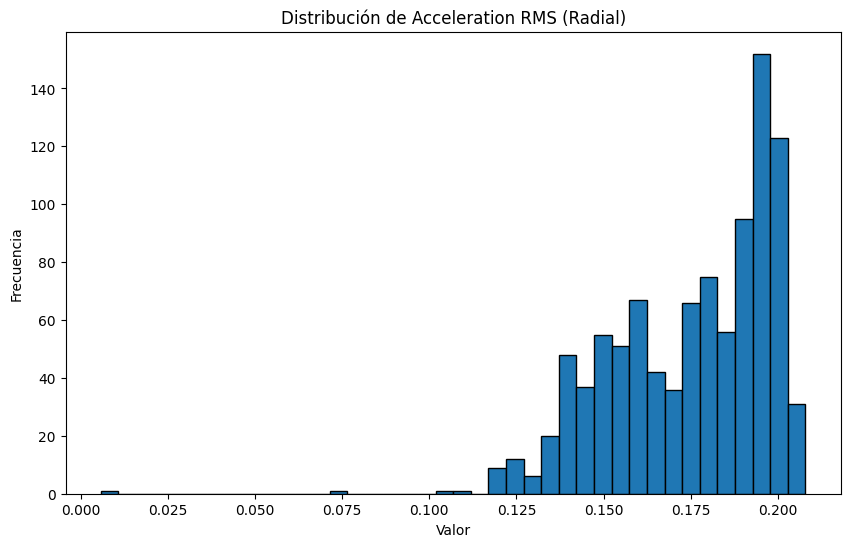

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from diagnostic_temporal import preparar_estructura_temporal 


var = "Acceleration RMS (Radial)"  # o la variable que quieras

# si ya tienes df con los datos del despliegue:
df_var = df[df["variable"] == var].copy()

# si en tu entorno se llama df_sorted, entonces:
# df_var = df_sorted[df_sorted["variable"] == var].copy()

df_var["valor"] = pd.to_numeric(df_var["valor"], errors="coerce")
df_var = df_var.dropna(subset=["valor"])

# Calcular percentiles
p50 = df_var["valor"].quantile(0.50)
p95 = df_var["valor"].quantile(0.95)
p99 = df_var["valor"].quantile(0.99)

# ------------------------
# 1) Histograma simple
# ------------------------
plt.figure(figsize=(10,6))
plt.hist(df_var["valor"], bins=40, edgecolor="black")
plt.title(f"Distribución de {var}")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

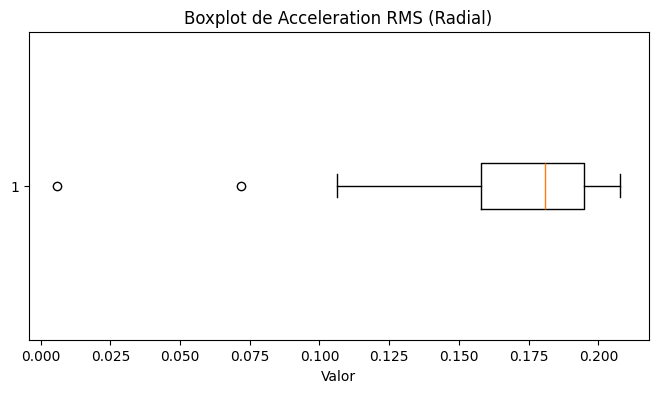

In [4]:
# ------------------------
# 2) Boxplot
# ------------------------
plt.figure(figsize=(8,4))
plt.boxplot(df_var["valor"], vert=False, whis=1.5)
plt.title(f"Boxplot de {var}")
plt.xlabel("Valor")
plt.show()



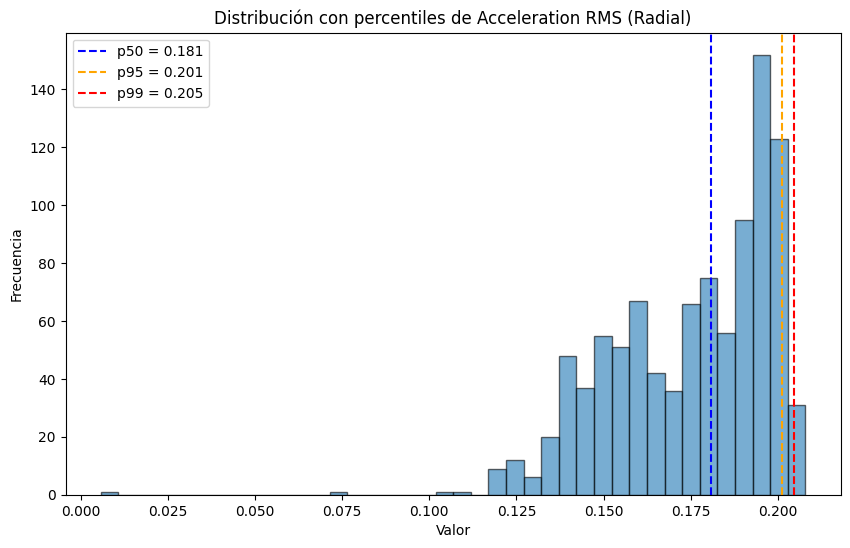

In [5]:
# ------------------------
# 3) Histograma con p50–p95–p99
# ------------------------
plt.figure(figsize=(10,6))
plt.hist(df_var["valor"], bins=40, alpha=0.6, edgecolor="black")

plt.axvline(p50, color="blue", linestyle="--", label=f"p50 = {p50:.3f}")
plt.axvline(p95, color="orange", linestyle="--", label=f"p95 = {p95:.3f}")
plt.axvline(p99, color="red", linestyle="--", label=f"p99 = {p99:.3f}")

plt.title(f"Distribución con percentiles de {var}")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()